Instructions
In this lab, we will first take a look at the degree of imbalance in the data and correct it using the techniques we learned on the class.

Here is the list of steps to be followed (building a simple model without balancing the data):

Import the required libraries and modules that you would need.
Read that data into Python and call the dataframe churnData.
Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
Check for null values in the dataframe. Replace the null values.
Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
Scale the features either by using normalizer or a standard scaler.
Split the data into a training set and a test set.
Fit a logistic regression model on the training data.
Check the accuracy on the test data.

In [9]:
# importing libraries
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Read that data into Python and call the dataframe churnData.
churnData = pd.read_csv('Customer-Churn.csv')
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [3]:
churnData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [4]:
#Check the datatypes of all the columns in the data. You would see that the column TotalCharges is object type. Convert this column into numeric type using pd.to_numeric function.
#Check for null values in the dataframe. Replace the null values.
churnData['TotalCharges'] = pd.to_numeric(churnData['TotalCharges'], errors='coerce')
churnData['TotalCharges'] = churnData['TotalCharges'].fillna(np.mean(churnData['TotalCharges']))


In [5]:
# Use the following features: tenure, SeniorCitizen, MonthlyCharges and TotalCharges:
#Scale the features either by using normalizer or a standard scaler.
from sklearn.preprocessing import StandardScaler 
X = churnData[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
transformer = StandardScaler().fit(X) 
X = transformer.transform(X) 
y = churnData['Churn'] 
# X_sm, y_sm = smote.fit_resample(X, y) 
# y_sm.value_counts()

In [11]:
y.value_counts()  # the target is imbalance

No     5174
Yes    1869
Name: Churn, dtype: int64

In [7]:
#Split the data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

The accuracy of the model on test set is: 0.80 
[[952  90]
 [195 172]]


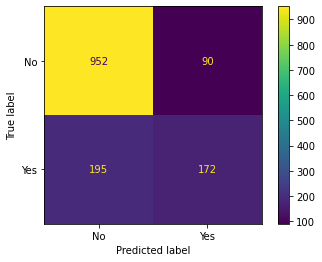

The Kappa of your model is: 0.42


In [10]:
# Fit a logistic regression model on the training data.

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs')
classification = model.fit(X_train, y_train)
prediction = classification.predict(X_test)
#Check the accuracy on the test data.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import cohen_kappa_score

print("The accuracy of the model on test set is: %4.2f " % accuracy_score(y_test, prediction))
print(confusion_matrix(y_test, prediction))
plot_confusion_matrix(classification, X_test, y_test)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model is: %4.2f" % (cohen_kappa_score(y_test, prediction)))

Note: So far we have not balanced the data.

Managing imbalance in the dataset

Check for the imbalance.
Use the resampling strategies used in class for upsampling and downsampling to create a balance between the two classes.
Each time fit the model and see how the accuracy of the model is.

Appling SMOTE for upsampling the data


In [12]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE() 
X_sm, y_sm = smote.fit_resample(X, y) 
y_sm.value_counts()



Yes    5174
No     5174
Name: Churn, dtype: int64

In [13]:
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2)

The accuracy of the model on test set after appling SMOTE for upsampling the data is: 0.73 
[[739 288]
 [272 771]]


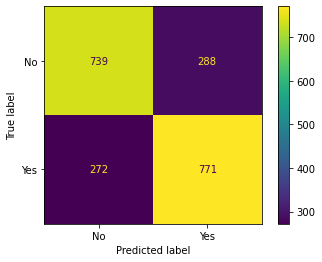

The Kappa of your model after appling SMOTE for upsampling the data is: 0.46


In [30]:
classification_sm = model.fit(X_train_sm, y_train_sm)
prediction_sm = classification_sm.predict(X_test_sm)
#Check the accuracy on the test data.
print("The accuracy of the model on test set after appling SMOTE for upsampling the data is: %4.2f " % accuracy_score(y_test_sm, prediction_sm))
print(confusion_matrix(y_test_sm, prediction_sm))
plot_confusion_matrix(classification_sm, X_test_sm, y_test_sm)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model after appling SMOTE for upsampling the data is: %4.2f" % (cohen_kappa_score(y_test_sm, prediction_sm)))

Down sampling

In [15]:
category_0 = churnData[churnData['Churn'] == 'Yes']
category_1 = churnData[churnData['Churn'] == 'No']

In [17]:
category_1 = category_1.sample(len(category_0))
print(category_0.shape)
print(category_1.shape)


(1869, 16)
(1869, 16)


In [20]:
churndata_ = pd.concat([category_0, category_1], axis=0)
#shuffling the data
# by selecting frac=1, we taking the a sample of the 100% but randomly selected, i.e shuuffled 
churnData_ = churnData.sample(frac=1)
churnData_['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [21]:
X_ = churnData_[['tenure', 'SeniorCitizen','MonthlyCharges', 'TotalCharges']]
transformer = StandardScaler().fit(X_) 
X_ = transformer.transform(X_) 
y_ = churnData_['Churn'] 

In [22]:
#Split the data into a training set and a test set.

X_train_, X_test_, y_train_, y_test_ = train_test_split(X_, y_, test_size=0.2)

The accuracy of the model on test set after down sampling of the data is: 0.80 
[[969  72]
 [203 165]]


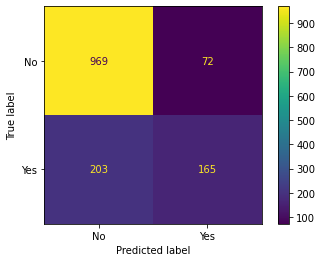

The Kappa of your model after down sampling of the data is: 0.43


In [29]:
classification_ = model.fit(X_train_, y_train_)
prediction_ = classification_.predict(X_test_)
#Check the accuracy on the test data.
print("The accuracy of the model on test set after down sampling of the data is: %4.2f " % accuracy_score(y_test_, prediction_))
print(confusion_matrix(y_test_, prediction_))
plot_confusion_matrix(classification_, X_test_, y_test_)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model after down sampling of the data is: %4.2f" % (cohen_kappa_score(y_test_, prediction_)))

Appling TomekLinks for downsampling

In [27]:
from imblearn.under_sampling import TomekLinks
tome = TomekLinks() 
X_tl, y_tl = tome.fit_resample(X, y) 
y_tl.value_counts()

No     4666
Yes    1869
Name: Churn, dtype: int64

In [28]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_tl, y_tl, test_size=0.2)

The accuracy of the model on test set after downsampling of the data by TomekLinks is: 0.80 
[[859  80]
 [179 189]]


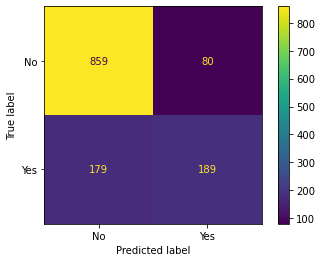

The Kappa of your model after downsampling of the data by TomekLinks is: 0.47


In [31]:
classification_tl = model.fit(X_train1, y_train1)
prediction_tl = classification_tl.predict(X_test1)
#Check the accuracy on the test data.
print("The accuracy of the model on test set after downsampling of the data by TomekLinks is: %4.2f " % accuracy_score(y_test1, prediction_tl))
print(confusion_matrix(y_test1, prediction_tl))
plot_confusion_matrix(classification_tl, X_test1, y_test1)  # doctest: +SKIP
plt.show()  # doctest: +SKIP
print("The Kappa of your model after downsampling of the data by TomekLinks is: %4.2f" % (cohen_kappa_score(y_test1, prediction_tl)))